# plot_prc

Plot Percision-Recall Curve from predictions data in *.csv* format.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
def get_data(path):
    
    df = pd.read_csv(path)
    
    return df.to_numpy()

In [3]:
# data_st = get_data('C:/data/paper_06_2021/st_2014_2019_prc.csv')
data_favor = get_data('C:/data/paper_06_2021/favor_dag_prc.csv')
data_cnn = get_data('C:/data/paper_06_2021/cnn_dag_prc.csv')
data_gpd = get_data('C:/data/paper_06_2021/ross_dag_prc.csv')

In [8]:
data_favor.shape, data_cnn.shape, data_gpd.shape

((28111, 3), (28111, 3), (28111, 3))

## Get TP, FP, FN

precision = tp / (tp + fp)

recall = tp / (tp + fn)

In [9]:
def get_prc_data(data, true_label, threshold):
    """
    Return number of true positives, false positives and false negatives.
    Data shape: <row, column>. columns: 0 - true label, 1 - predicted label, 2 - probability.
    """
    tp = fp = fn = 0
    for i in range(data.shape[0]):
        
        if data[i][2] >= threshold:
            y_pred = data[i][1]
        else:
            y_pred = -1
            
        if data[i][0] == y_pred == true_label:
            tp += 1
        elif y_pred == true_label:
            fp += 1
        elif data[i][0] == true_label:
            fn += 1
            
    if tp + fp != 0:
        precision = tp / (tp + fp)
    else:
        precision = np.Inf
    if tp + fn != 0:
        recall = tp / (tp + fn)
    else:
        recall = np.Inf
            
    return {'tp': tp, 'fp': fp, 'fn': fn, 'precision': precision, 'recall': recall}

In [10]:
# Example run
# get_prc_data(data, 0, 0.95)

In [11]:
def plot_prc(data, label, thresholds):
    """
    Gather and plot percision/recall curve.
    """
    # Gather data
    precision = []
    recall = []
    
    for t in thresholds:
        
        prc_data = get_prc_data(data, label, t)
        
        precision.append(prc_data['precision'])
        recall.append(prc_data['recall'])
        
    # Plot PRC
    plt.plot(recall, precision)

In [12]:
thresholds = np.linspace(0.1, 0.9, 9)

In [13]:
thresholds

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [14]:
def append_prc(data, label, threshold, precision, recall):
    
    prc_data = get_prc_data(data, label, threshold)
    precision.append(prc_data['precision'])
    recall.append(prc_data['recall'])

In [15]:
def precision_recall_single(data):
    
    precision_P = []
    precision_S = []
    precision_N = []
    
    recall_P = []
    recall_S = []
    recall_N = []
    
    for t in thresholds:
        
        append_prc(data, 0, t, precision_P, recall_P)
        append_prc(data, 1, t, precision_S, recall_S)
        append_prc(data, 2, t, precision_N, recall_N)
        
    return {'precision': {'p': precision_P, 's': precision_S, 'n': precision_N}, 
            'recall': {'p': recall_P, 's': recall_S, 'n': recall_N}}

In [16]:
def precision_recall(data_1, data_2):
    
    precision_1_P = []
    recall_1_P = []
    precision_2_P = []
    recall_2_P = []
    
    precision_1_S = []
    recall_1_S = []
    precision_2_S = []
    recall_2_S = []
    
    for t in thresholds:
        
        append_prc(data_1, 0, t, precision_1_P, recall_1_P)
        append_prc(data_1, 1, t, precision_1_S, recall_1_S)
        
        append_prc(data_2, 0, t, precision_2_P, recall_2_P)
        append_prc(data_2, 1, t, precision_2_S, recall_2_S)
        
    return [precision_1_P, precision_1_S, precision_2_P, precision_2_S], [recall_1_P, recall_1_S, recall_2_P, recall_2_S]

In [17]:
# Generate plot data
precision_recall = {}

# precision_recall['st'] = precision_recall_single(data_st)
precision_recall['favor'] = precision_recall_single(data_favor)
precision_recall['cnn'] = precision_recall_single(data_cnn)
precision_recall['gpd'] = precision_recall_single(data_gpd)

In [18]:
# Generate plot data
# precision, recall = precision_recall(data_1, data_2)

In [35]:
def plot_prc_2(precision_recall):
    """
    Gather and plot percision/recall curve.
    """
    from matplotlib.ticker import FormatStrFormatter
    
    # Set shorter alias
    pr = precision_recall
    
    # Plot PRC
    fig = plt.figure(figsize = (7, 3), dpi = 160)
    axes = fig.subplots(1, 2, sharey = True)
    
    fig.text(0.512, 0.00, 'Recall', va = 'center')
    
    middle_point = 4
    mark_size = 4.
    star_size = 8.
    
    axes[0].set_ylabel('Precision')
    
    # P
    """
    axes[0].plot(pr['st']['recall']['p'], pr['st']['precision']['p'],
                 '-b^', label = 'Transformer', markersize = mark_size)
    axes[0].plot(pr['st']['recall']['p'][middle_point], pr['st']['precision']['p'][middle_point],
                 'r*', markersize = star_size)
    """
    
    axes[0].plot(pr['favor']['recall']['p'], pr['favor']['precision']['p'],
                 '-g^', label = 'Performer', markersize = mark_size)
    axes[0].plot(pr['favor']['recall']['p'][middle_point], pr['favor']['precision']['p'][middle_point],
                 'r*', markersize = star_size)
    
    axes[0].plot(pr['cnn']['recall']['p'], pr['cnn']['precision']['p'],
                 '-y^', label = 'CNN', markersize = mark_size)
    axes[0].plot(pr['cnn']['recall']['p'][middle_point], pr['cnn']['precision']['p'][middle_point],
                 'r*', markersize = star_size)
    
    axes[0].plot(pr['gpd']['recall']['p'], pr['gpd']['precision']['p'],
                 '-b^', label = 'GPD', markersize = mark_size)
    axes[0].plot(pr['gpd']['recall']['p'][middle_point], pr['gpd']['precision']['p'][middle_point],
                 'r*', markersize = star_size)
    
    # S
    """
    axes[1].plot(pr['st']['recall']['s'], pr['st']['precision']['s'],
                 '-b^', label = 'Transformer', markersize = mark_size)
    axes[1].plot(pr['st']['recall']['s'][middle_point], pr['st']['precision']['s'][middle_point],
                 'r*', markersize = star_size)
    """
    
    axes[1].plot(pr['favor']['recall']['s'], pr['favor']['precision']['s'],
                 '-g^', label = 'Performer', markersize = mark_size)
    axes[1].plot(pr['favor']['recall']['s'][middle_point], pr['favor']['precision']['s'][middle_point],
                 'r*', markersize = star_size)
    
    axes[1].plot(pr['cnn']['recall']['s'], pr['cnn']['precision']['s'],
                 '-y^', label = 'CNN', markersize = mark_size)
    axes[1].plot(pr['cnn']['recall']['s'][middle_point], pr['cnn']['precision']['s'][middle_point],
                 'r*', markersize = star_size)
    
    axes[1].plot(pr['gpd']['recall']['s'], pr['gpd']['precision']['s'],
                 '-b^', label = 'GPD', markersize = mark_size)
    axes[1].plot(pr['gpd']['recall']['s'][middle_point], pr['gpd']['precision']['s'][middle_point],
                 'r*', markersize = star_size)
    
    """
    # N
    axes[2].plot(pr['st']['recall']['n'], pr['st']['precision']['n'],
                 '-b^', label = 'Transformer', markersize = mark_size)
    axes[2].plot(pr['st']['recall']['n'][middle_point], pr['st']['precision']['n'][middle_point],
                 'r*', markersize = star_size)
    
    axes[2].plot(pr['favor']['recall']['n'], pr['favor']['precision']['n'],
                 '-g^', label = 'Performer', markersize = mark_size)
    axes[2].plot(pr['favor']['recall']['n'][middle_point], pr['favor']['precision']['n'][middle_point],
                 'r*', markersize = star_size)
    
    axes[2].plot(pr['cnn']['recall']['n'], pr['cnn']['precision']['n'],
                 '-y^', label = 'CNN', markersize = mark_size)
    axes[2].plot(pr['cnn']['recall']['n'][middle_point], pr['cnn']['precision']['n'][middle_point],
                 'r*', markersize = star_size)
    """
    
    ticks = np.array([0.825, 0.85, 0.875, 0.90, 0.925, 0.95, 0.975])
    
    axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # axes[2].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # axes[0].set_xticks(ticks)
    # axes[1].set_xticks(ticks)
    # axes[2].set_xticks(ticks)
    
    # axes[0].set_xlim(0.55, 1.)
    # axes[1].set_xlim(0.55, 1.)
    # axes[2].set_xlim(0.725, 1.)
    
    axes[0].legend()
    
    axes[0].set_title('P')
    axes[1].set_title('S')
    # axes[2].set_title('N')
    
    fig.tight_layout()

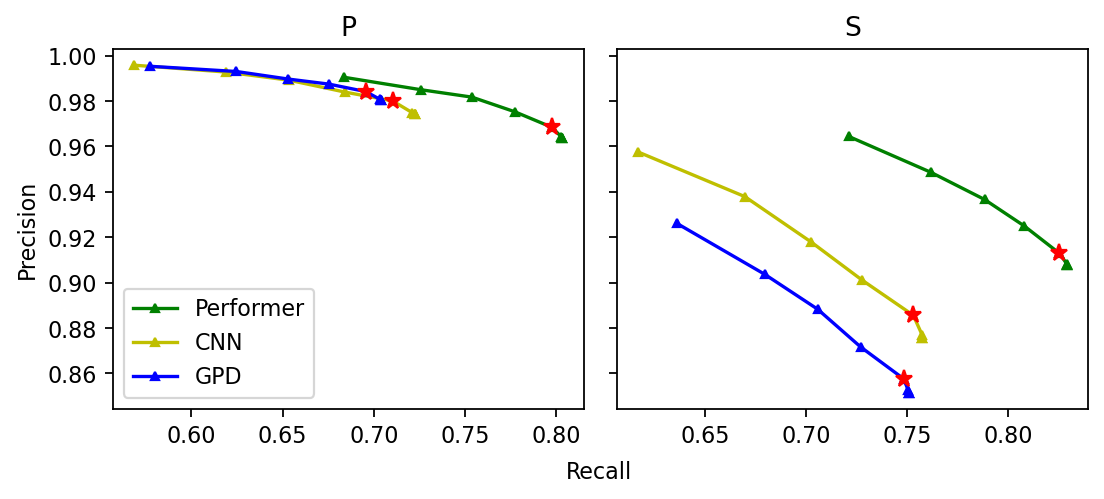

In [36]:
plot_prc_2(precision_recall)